# Import dependencies and data

the needed packages are :
- matplotlib
- tensorflow 
- tensorflow-datasets 

In [1]:
import tensorflow as tf

gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)
    


In [2]:
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [3]:
#we import the dataset that we want

ds= tfds.load("fashion_mnist",split='train')

In [4]:
#we turn the dataset into a numpy iterable
#the command .next() donne le premier élément d'un dataset

ds.as_numpy_iterator().next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

In [11]:
import numpy as np


In [6]:
dataiterator = ds.as_numpy_iterator()

# visualization 

Some methods we need to know:
- np.squeeze(table) allows a table to be reduced in dimension 1
- ax.imshow() (ax is a container for displaying graphics etc.). imshow() allows you to display an image by arguing an array or matrix or something else

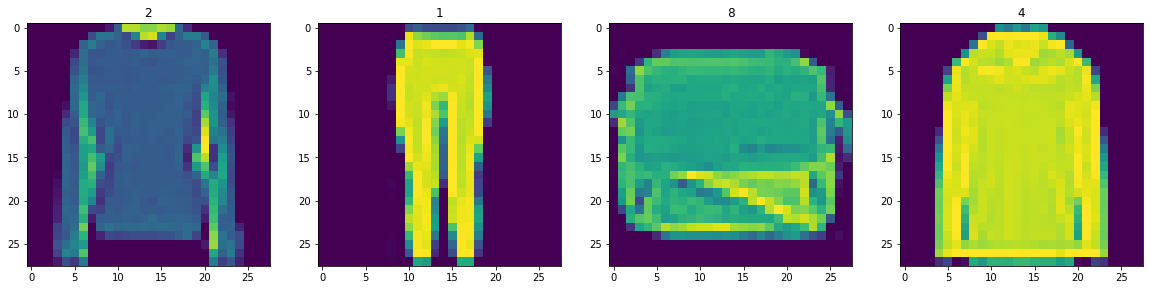

In [7]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for i in range(4):
    sample = dataiterator.next()
    ax[i].imshow(np.squeeze(sample['image']))
    #we could have done it without using the squeeze method
    ax[i].title.set_text(sample['label'])

In [4]:
# we scale the imamges 

def scale_images(data):
    image= data['image']
    return image/255

# Prepare the data

$\textbf{ds = ds.map(scale_images)} : 
$\
This line applies a transformation to the elements of the dataset ds using the map() method. The scale_images function is a custom function that is applied to each element of the dataset. This function can perform specific processing, such as scaling images in the case of a computer vision problem.


$\textbf{ds = ds.cache()}:
$\
This line adds a caching step (cache()) to the dataset ds. This means that the data is stored in memory after its first use, which can speed up subsequent iterations when it is reused. This is particularly useful if the dataset fits in memory and is used multiple times.

$\textbf{ds = ds.cache(ds = ds.shuffle(60000))}:
$\
This line shuffles the elements of the dataset ds using the shuffle() method. The argument 60000 indicates the number of elements to shuffle. This is commonly used in the context of machine learning to randomize the order of training examples, which can improve the quality of the model's training.

$\textbf{ds = ds.batch(128)}:
$\
This line groups the elements of the dataset ds into batches of size 128 using the batch() method. This means that multiple examples will be processed simultaneously during model training, which can improve training efficiency by taking advantage of hardware parallelism.


$\textbf{ds = ds.prefetch(64)}:
$\
This line prefetches (prefetch()) data in the background to speed up processing during training. The argument 64 specifies the number of elements to prefetch. This helps to reduce waiting time between each iteration by preparing the next elements of the dataset in advance.

In [5]:
ds = tfds.load('fashion_mnist', split='train')
ds= ds.map(scale_images)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

In [6]:
ds.as_numpy_iterator().next().shape
#we observe that, now, the images are grouped by 128 thanks to the command batch

(128, 28, 28, 1)

# Let's Build the model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

### Build the generator


In [120]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(7*7*128, input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))
    
    # Upsampling block 1 
    model.add(UpSampling2D())
    model.add(Conv2D(32, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Upsampling block 2 
    model.add(UpSampling2D())
    model.add(Conv2D(32, 5, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 1
    model.add(Conv2D(32, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Convolutional block 2
    model.add(Conv2D(32, 4, padding='same'))
    model.add(LeakyReLU(0.2))
    
    # Conv layer to get to one channel
    model.add(Conv2D(1, 4, padding='same', activation='sigmoid'))
    
    return model

- model = Sequential(): This line creates a Sequential object that represents the neural network model. A sequential model is a linear stack of layers, commonly used for image generation models.



- model.add(Dense(7*7*128, input_dim=128)): This line adds a dense layer to the model. A dense layer is a fully connected layer, where each neuron is connected to all neurons in the previous layer. In this case, the dense layer has 77128 neurons and takes a 128-dimensional input vector. This means the generator takes a random vector of size 128 and transforms it into a representation of size 7*7*128.



- model.add(LeakyReLU(0.2)): This line adds a LeakyReLU (Rectified Linear Unit) activation layer to the model. LeakyReLU is an activation function that introduces a slightly negative slope for negative values, which can help avoid gradient vanishing problems. The parameter 0.2 specifies the slope for negative values.



- model.add(Reshape(7, 7, 128)): This line adds a reshaping layer to the model. It transforms the output of the previous layer into a tensor of shape (7, 7, 128). This gives a grid structure to the output, so it can be interpreted as a 2D image of size 7x7 with 128 channels.


- model.add(UpSampling2D()): This line adds an upsampling layer to the model. Upsampling is an operation that increases the spatial size of the image by inserting intermediate values between existing pixels. UpSampling2D() is specific to increasing the spatial size of a 2D image. It can double the spatial size of the image by adding an additional row and column between each pair of existing rows and columns.

- model.add(Conv2D(128, 5, padding='same')): This line adds a 2D convolution layer to the model. A 2D convolution is an operation that applies a filter to an image to extract local features. Conv2D is specific to 2D convolution. In this case, the convolution layer has 128 filters and uses a kernel size of 5x5. The parameter padding='same' indicates that padding will be applied to maintain the same output size as the input.

model.add(LeakyReLU(0.2)): This line adds a LeakyReLU activation layer to the model. LeakyReLU is an activation function that introduces a slightly negative slope for negative values, helping to avoid gradient vanishing problems. The parameter 0.2 specifies the slope for negative values.




In [121]:
generator=build_generator()
generator.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 6272)              809088    
_________________________________________________________________
leaky_re_lu_73 (LeakyReLU)   (None, 6272)              0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_18 (UpSampling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 14, 14, 32)        102432    
_________________________________________________________________
leaky_re_lu_74 (LeakyReLU)   (None, 14, 14, 32)        0         
_________________________________________________________________
up_sampling2d_19 (UpSampling (None, 28, 28, 32)      

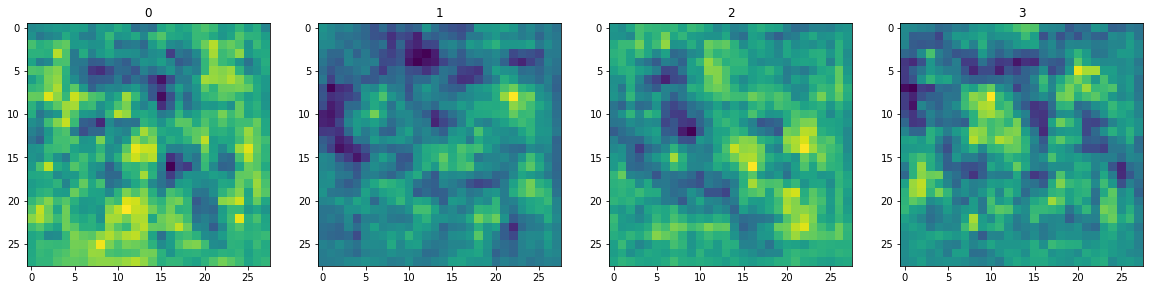

In [12]:
img=generator.predict(np.random.randn(4,128))

fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for i,img in enumerate(img):
    ax[i].imshow(np.squeeze(img))
    #we could have done it without using the squeeze method
    ax[i].title.set_text(i)

At this stage, the pixels are totaly random

### Discriminator

In [118]:
def build_discriminator(): 
    model = Sequential()
    
    # First Conv Block
    model.add(Conv2D(16, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Second Conv Block
    model.add(Conv2D(32, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Third Conv Block
    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Fourth Conv Block
    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    # Flatten then pass to dense layer
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [119]:
discriminator= build_discriminator()
discriminator.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
leaky_re_lu_69 (LeakyReLU)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 20, 20, 32)        12832     
_________________________________________________________________
leaky_re_lu_70 (LeakyReLU)   (None, 20, 20, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 64)      

In [15]:
img = np.reshape(img, (1, 28, 28, 1))  # we add a dimension for the batch
result = discriminator.predict(img)
print(result)

[[0.50349903]]


# Training 

In [122]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [123]:
generator_opt =Adam(learning_rate=0.001)
discrimnator_opt= Adam(learning_rate=0.0001)

generator_loss= BinaryCrossentropy()
discriminator_loss= BinaryCrossentropy()

In [124]:
#importing the base model class to subclass our training step
from tensorflow.keras.models import Model

In [131]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [132]:
#create an instance of subclass model
fashgan=fashionGAN(generator,discriminator)

In [133]:
#compile the model
fashgan.compile(generator_opt,discrimnator_opt,generator_loss,discriminator_loss)

### Build callback

In [134]:
import os 
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [135]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

### Train

In [137]:
hist=fashgan.fit(ds,epochs=10)

Epoch 1/10
469/469 [==============================] - 94s 200ms/step - d_loss: -0.3815 - g_loss: 12.7262
Epoch 2/10
469/469 [==============================] - 94s 200ms/step - d_loss: -0.3932 - g_loss: 12.6667
Epoch 3/10
469/469 [==============================] - 95s 202ms/step - d_loss: -0.3958 - g_loss: 15.5951
Epoch 4/10
469/469 [==============================] - 97s 208ms/step - d_loss: -0.3967 - g_loss: 12.0368
Epoch 5/10
469/469 [==============================] - 99s 211ms/step - d_loss: -0.3971 - g_loss: 10.6859
Epoch 6/10
469/469 [==============================] - 100s 213ms/step - d_loss: -0.3973 - g_loss: 10.3025
Epoch 7/10
469/469 [==============================] - 108s 230ms/step - d_loss: -0.3975 - g_loss: 9.5438
Epoch 8/10
469/469 [==============================] - 112s 240ms/step - d_loss: -0.3976 - g_loss: 9.3522
Epoch 9/10
469/469 [==============================] - 114s 243ms/step - d_loss: -0.3977 - g_loss: 8.6984
Epoch 10/10
469/469 [==============================] -

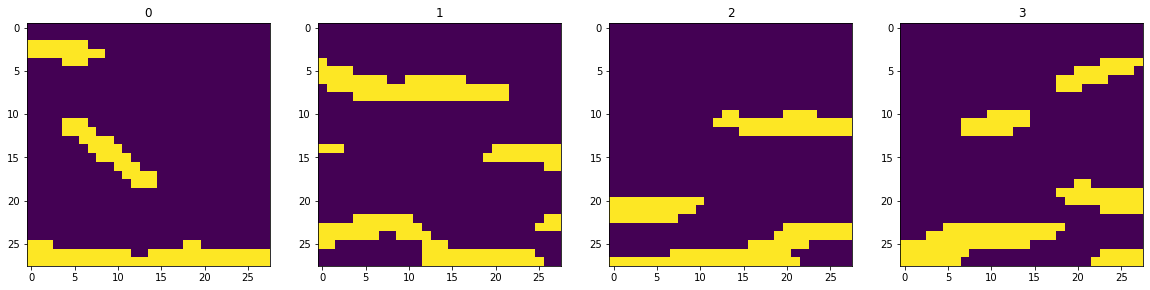

In [138]:
# Generate new fashion
img = generator.predict(np.random.randn(4,128))
# Setup the subplot formatting 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# Loop four times and get images 
for idx, img in enumerate(img): 
    # Plot the image using a specific subplot 
    ax[idx].imshow(np.squeeze(img))
    # Appending the image label as the plot title 
    ax[idx].title.set_text(idx)

After 20 epochs we obtain an only black image. It is still better than the image we had at the begining (only random pixels).

The problem is that we don' do enough iterations but my computer is not powerfull enough to do that.

In the tuto I have watch, Nicholas has done 2000 epochs before having something good. 